In [24]:
# Load necessary packages
import numpy as np
import pandas as pd
import nltk
import warnings
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Data Exploration and Preprocessing

In [25]:
# Load the dataset
data = pd.read_csv('blogs_categories.csv')
data.head(20)

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
5,5,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
6,6,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
7,7,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
8,8,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
9,9,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism


In [26]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [27]:
# Preprocess the text data
def preprocess_text(text):
  """
  Function to clean, tokenize, and lowercase text data

  Args:
      text (str): The text to be preprocessed

  Returns:
      str: The preprocessed text
  """
  # Remove punctuation
  text = text.lower()  # Convert to lowercase
  text = "".join([char for char in text if char.isalnum() or char.isspace()])

  # Tokenize the text
  tokens = word_tokenize(text)

  # Remove stopwords
  stop_words = stopwords.words("english")  # Get the stopwords list
  tokens = [token for token in tokens if token not in stop_words]

  # Join the tokens back into text
  preprocessed_text = " ".join(tokens)
  return preprocessed_text

# Import NLTK library (important!)
import nltk

# Download NLTK resources (punkt model and stopwords)
nltk.download('punkt')
nltk.download('stopwords')

# Apply preprocessing to the "Data" column
data["Text"] = data["Data"].apply(lambda x: x.split("...")[0]).apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed
features = vectorizer.fit_transform(data["Text"])

# Explore the TF-IDF features (optional)
print(features.shape)  # Check the dimensions of the feature matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(19997, 2000)


## Naive Bayes Model for Text Classification

In [28]:
# Separate features and target labels
X = features
y = data["Labels"]

# Split data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

# Implement Naive Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)


MultinomialNB()

## Sentiment Analysis

In [29]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    """
    Function to get sentiment of a text.

    Args:
        text (str): The text to analyze.

    Returns:
        str: Sentiment category (positive, negative, neutral).
    """
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the "Text" column
data["Sentiment"] = data["Text"].apply(get_sentiment)

# Examine the distribution of sentiments across different categories
sentiment_distribution = data.groupby("Labels")["Sentiment"].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_distribution)

Sentiment                 negative   neutral  positive
Labels                                                
alt.atheism               0.353000  0.069000  0.578000
comp.graphics             0.101000  0.112000  0.787000
comp.os.ms-windows.misc   0.152000  0.105000  0.743000
comp.sys.ibm.pc.hardware  0.186000  0.092000  0.722000
comp.sys.mac.hardware     0.199000  0.108000  0.693000
comp.windows.x            0.206000  0.102000  0.692000
misc.forsale              0.118000  0.131000  0.751000
rec.autos                 0.289000  0.106000  0.605000
rec.motorcycles           0.269000  0.109000  0.622000
rec.sport.baseball        0.194000  0.129000  0.677000
rec.sport.hockey          0.250000  0.147000  0.603000
sci.crypt                 0.249000  0.093000  0.658000
sci.electronics           0.138000  0.164000  0.698000
sci.med                   0.293000  0.123000  0.584000
sci.space                 0.225000  0.131000  0.644000
soc.religion.christian    0.227683  0.017051  0.755266
talk.polit

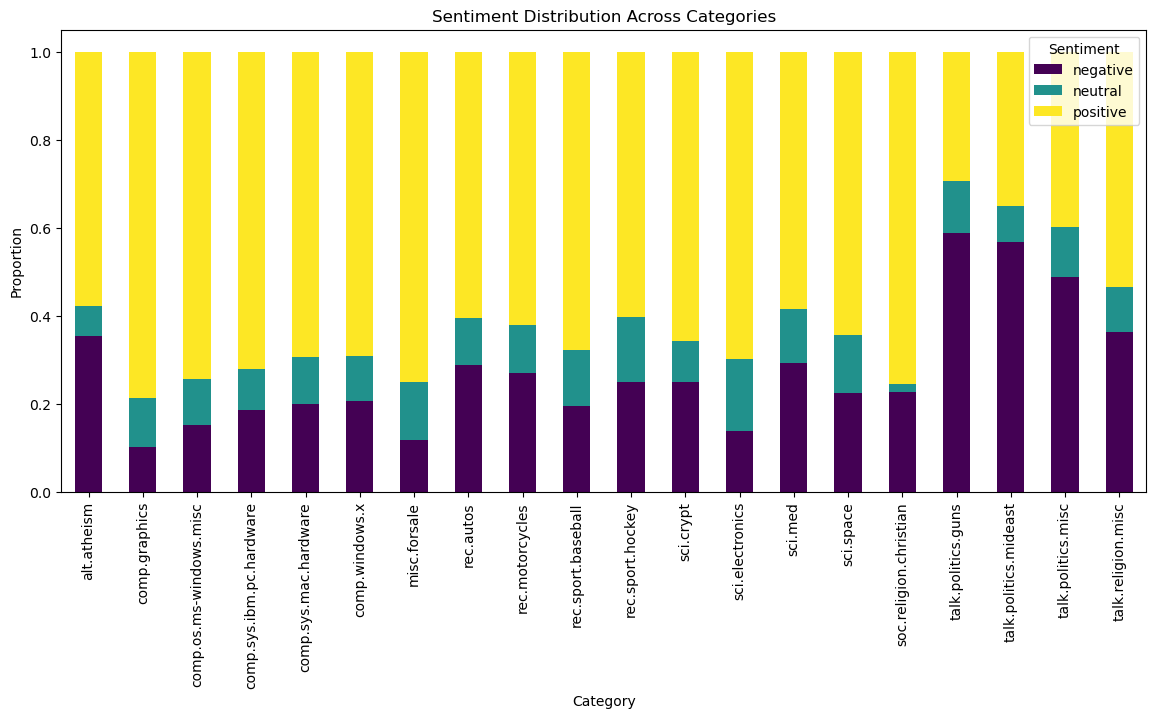

In [30]:
# Plot the sentiment distribution
sentiment_distribution.plot(kind="bar", stacked=True, figsize=(14, 6), colormap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

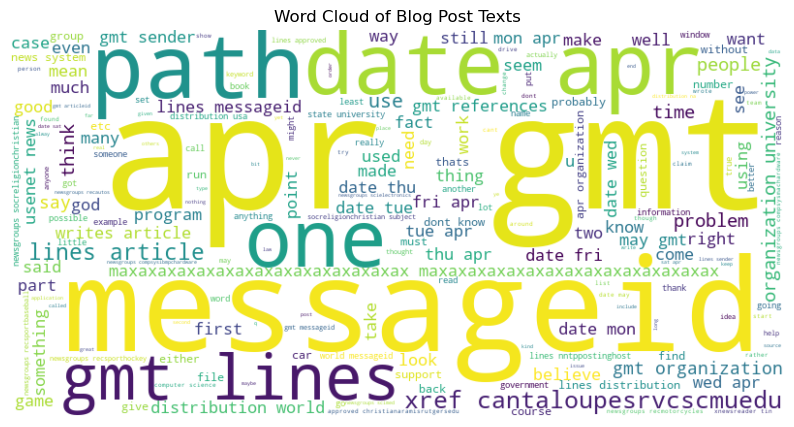

In [31]:
# Create a word cloud visualization
all_text = " ".join(text for text in data["Text"])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Blog Post Texts')
plt.show()

## Evaluation

In [32]:
# Predict the test set
y_pred = model.predict(X_test)

In [33]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8638
Precision: 0.8636
Recall: 0.8638
F1-Score: 0.8627


In [34]:
# Display the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.80      0.76       274
           comp.graphics       0.77      0.84      0.81       290
 comp.os.ms-windows.misc       0.83      0.84      0.83       320
comp.sys.ibm.pc.hardware       0.85      0.80      0.83       304
   comp.sys.mac.hardware       0.88      0.88      0.88       296
          comp.windows.x       0.89      0.90      0.89       293
            misc.forsale       0.81      0.88      0.84       297
               rec.autos       0.87      0.92      0.90       306
         rec.motorcycles       0.96      0.91      0.94       317
      rec.sport.baseball       0.96      0.94      0.95       290
        rec.sport.hockey       0.95      0.98      0.97       301
               sci.crypt       0.96      0.91      0.93       295
         sci.electronics       0.89      0.82      0.85       318
                 sci.med       0.92      0.87      

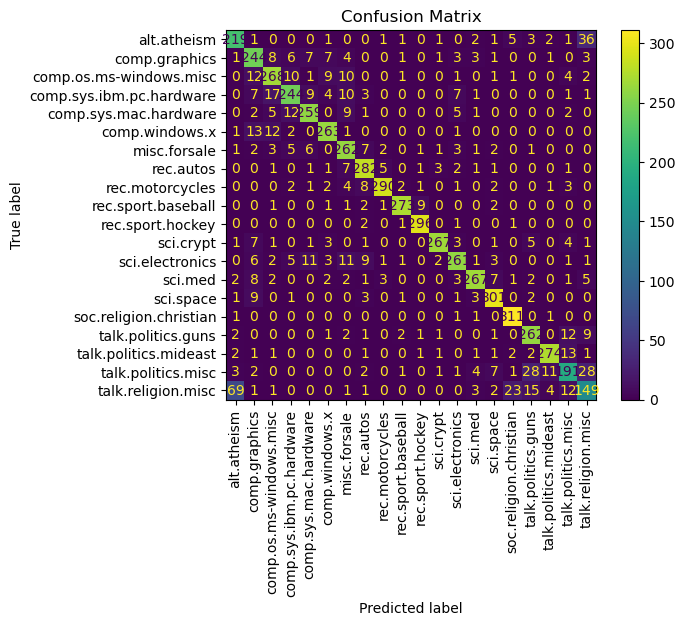

In [35]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Discuss performance and challenges
print("\nDiscussion:")
print("The Naive Bayes classifier achieved an accuracy of {:.4f}, which indicates that the model is performing reasonably well on the test set.".format(accuracy))
print("The precision, recall, and F1-score metrics provide further insights into the performance of the model.")
print("Precision is {:.4f}, indicating the proportion of true positive predictions among all positive predictions.".format(precision))
print("Recall is {:.4f}, reflecting the proportion of true positive predictions among all actual positives.".format(recall))
print("F1-Score is {:.4f}, representing the harmonic mean of precision and recall.".format(f1))
print("Challenges encountered during the classification process may include imbalanced classes, noisy text data, and the need for further text preprocessing to improve model performance.")


Discussion:
The Naive Bayes classifier achieved an accuracy of 0.8638, which indicates that the model is performing reasonably well on the test set.
The precision, recall, and F1-score metrics provide further insights into the performance of the model.
Precision is 0.8636, indicating the proportion of true positive predictions among all positive predictions.
Recall is 0.8638, reflecting the proportion of true positive predictions among all actual positives.
F1-Score is 0.8627, representing the harmonic mean of precision and recall.
Challenges encountered during the classification process may include imbalanced classes, noisy text data, and the need for further text preprocessing to improve model performance.


In [37]:
# Reflect on sentiment analysis results
sentiment_counts = data["Sentiment"].value_counts()
print("\nSentiment Analysis Reflection:")
print("The sentiment analysis results provide an overview of the general sentiments expressed in the blog posts.")
print(f"Positive sentiments: {sentiment_counts.get('positive', 0)}")
print(f"Negative sentiments: {sentiment_counts.get('negative', 0)}")
print(f"Neutral sentiments: {sentiment_counts.get('neutral', 0)}")
print("These results indicate the overall tone of the content in the blog posts. For example, a higher proportion of positive sentiments may suggest a generally positive outlook in the posts, while more negative sentiments might indicate critical or negative discussions.")


Sentiment Analysis Reflection:
The sentiment analysis results provide an overview of the general sentiments expressed in the blog posts.
Positive sentiments: 12388
Negative sentiments: 5455
Neutral sentiments: 2154
These results indicate the overall tone of the content in the blog posts. For example, a higher proportion of positive sentiments may suggest a generally positive outlook in the posts, while more negative sentiments might indicate critical or negative discussions.
